<a href="https://colab.research.google.com/github/McEmmy99/ML-AI/blob/master/Copy_of_Amazon_Fine_Food_Reviews_(Sentiment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:


#from google.colab import files
#uploaded = files.upload()

#https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92 (To upload dataset)

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [2]:
link = 'https://drive.google.com/open?id=1RBIuWxZc403si0fpeZsXFlutO9ECuk1d'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='


1RBIuWxZc403si0fpeZsXFlutO9ECuk1d


In [0]:
import pandas as pd

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Reviews.csv')  
reviews_df = pd.read_csv('Reviews.csv')

In [4]:
reviews_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
#reviews_df.drop([])
#reviews_df.loc[reviews_df["Score"]==3]

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [0]:
#reviews_df = reviews_df.iloc[:200000]

In [7]:
reviews_df.drop(["ProductId", "UserId", "ProfileName", "HelpfulnessNumerator", "HelpfulnessDenominator", "Time", "Summary", "Id"], axis = 1, inplace = True) 

reviews_df

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
...,...,...
568449,5,Great for sesame chicken..this is a good if no...
568450,2,I'm disappointed with the flavor. The chocolat...
568451,5,"These stars are small, so you can give 10-15 o..."
568452,5,These are the BEST treats for training and rew...


In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from plotnine import *
%matplotlib inline

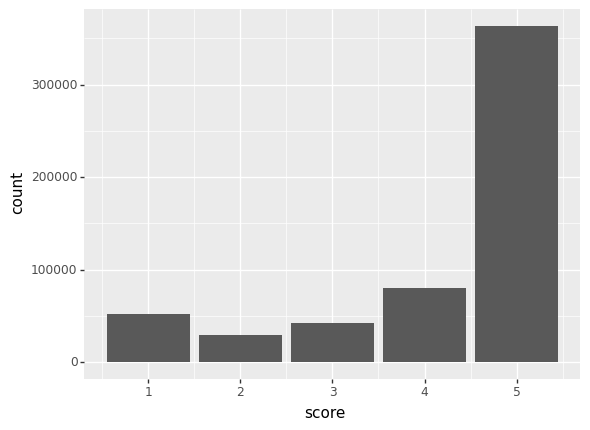

<ggplot: (-9223363252000421081)>

In [9]:
score = reviews_df['Score']
(ggplot(reviews_df)         # defining what data to use
 + aes(x='score')    # defining what variable to use
 + geom_bar(size=20) # defining the type of plot to use
)

In [10]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

import os

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import string
import re
import numpy
import sys
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from keras.layers import Dense, Dropout, LSTM
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
import nltk
nltk.download('stopwords')

Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
def remove_stop_words(words):

    # if the created word isn't in the stop words, make it part of "filtered"
    filtered = filter(lambda word: word not in stopwords.words('english'), words)
    return " ".join(filtered)

def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    #Remove stop words
    sentence = remove_stop_words(sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [0]:
X = []
sentences = list(reviews_df['Text'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [0]:
y = reviews_df['Score']

In [24]:
print(y)

0         5
1         1
2         4
3         2
4         5
         ..
568449    5
568450    2
568451    5
568452    5
568453    5
Name: Score, Length: 568454, dtype: int64


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [25]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each review.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(reviews_df['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 133039 unique tokens.


In [26]:
X = tokenizer.texts_to_sequences(reviews_df['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (568454, 250)


In [27]:
#Y = reviews_df['Score'].values
Y = pd.get_dummies(reviews_df['Score']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (568454, 5)


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(511608, 250) (511608, 5)
(56846, 250) (56846, 5)


In [0]:
from keras.layers import SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.layers import Embedding

In [32]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 460447 samples, validate on 51161 samples
Epoch 1/5
460447/460447 [==============================] - 3157s 7ms/step - loss: 0.7522 - accuracy: 0.7210 - val_loss: 0.6388 - val_accuracy: 0.7606
Epoch 2/5
460447/460447 [==============================] - 3348s 7ms/step - loss: 0.5963 - accuracy: 0.7774 - val_loss: 0.5832 - val_accuracy: 0.7832
Epoch 3/5
460447/460447 [==============================] - 3447s 7ms/step - loss: 0.5222 - accuracy: 0.8065 - val_loss: 0.5593 - val_accuracy: 0.7971
Epoch 4/5
460447/460447 [==============================] - 3449s 7ms/step - loss: 0.4701 - accuracy: 0.8267 - val_loss: 0.5496 - val_accuracy: 0.8045
Epoch 5/5
460447/460447 [==============================] - 3486s 8ms/step - loss: 0.4312 - accuracy: 0.8418 - val_loss: 0.5499 - val_accuracy: 0.8077


In [35]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Accuracy: 81.03%


In [0]:
from keras.models import model_from_json
#save the model
from keras.models import model_from_json

In [52]:
#Save my model weights and architecture
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 



Saved model to disk
Saved model to disk


In [53]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [58]:
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 81.03%


In [0]:
import numpy as np

In [63]:
#Test Model on a new review
new_review = ['I enjoyed this product but I think it is still expensive. It served it purpose anyways']
seq = tokenizer.texts_to_sequences(new_review)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = [1,2,3,4,5]
print(pred, labels[np.argmax(pred)])

[[0.01024358 0.02855914 0.43728918 0.47046703 0.05344113]] 4


In [79]:
new_review = ["The products are expired"]
seq = tokenizer.texts_to_sequences(new_review)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = [1,2,3,4,5]
print(pred, labels[np.argmax(pred)])

[[0.81504923 0.1182774  0.06158569 0.0022038  0.00288383]] 1
